In [4]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import os
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import LabelEncoder

In [22]:
from keras.datasets import cifar10
from keras.utils import np_utils

def load_imgs(save_folder, img_size=(224, 224)):
    imgs = []
    files = [file for file in os.listdir(save_folder) if file.endswith('png')]
    for file in files:
        img_path = os.path.join(save_folder, file)
        img = image.load_img(img_path, target_size=img_size)
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    
    return imgs

def data_cifar10():
    """
    Preprocess CIFAR-10 dataset
    """
    # the data, shuffled and split between train and test sets
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)

    print(X_train.shape)
    print(Y_train.shape)
    print(X_test.shape)
    print(Y_test.shape)
    
    return X_train, Y_train, X_test, Y_test

In [55]:
X = load_imgs('../data/images_reuben/', (200, 200))
df = pd.read_csv('../data/images_reuben/data.csv', index_col=0)
shapes = df['shape'].as_matrix()
colors = df['color'].as_matrix()
textures = df['texture'].as_matrix()

In [56]:
df.shape

(20, 3)

In [60]:
Y.shape

(20, 10)

In [59]:
X.shape

(20, 200, 200, 3)

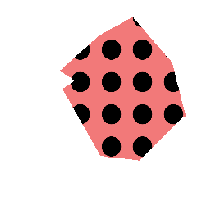

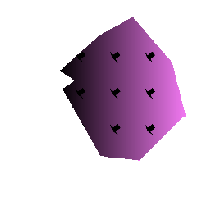

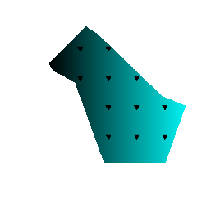

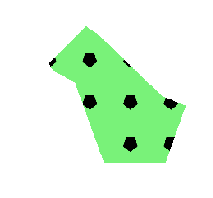

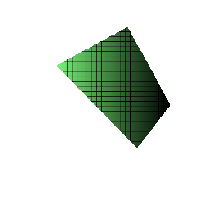

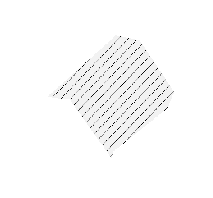

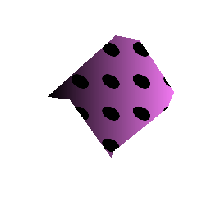

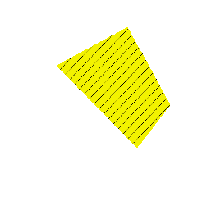

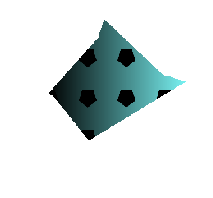

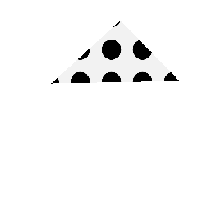

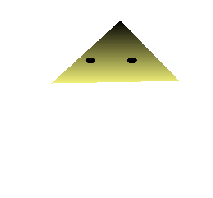

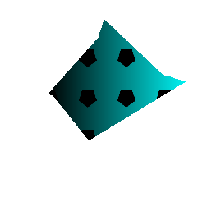

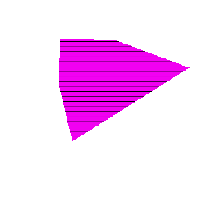

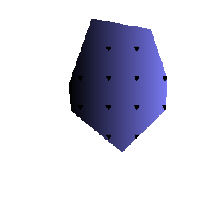

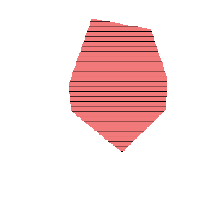

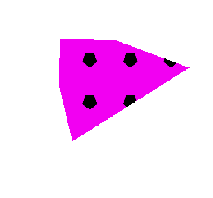

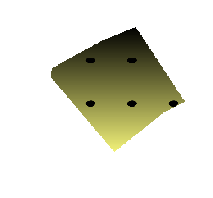

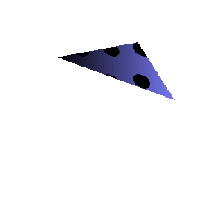

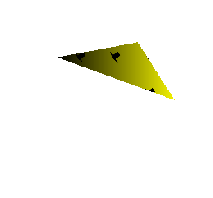

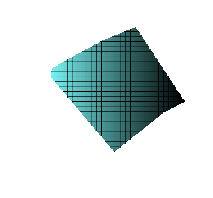

In [52]:
%matplotlib inline
import matplotlib.pylab as plt

for i in range(20):
    plt.figure(figsize=(3, 3))
    plt.imshow(X[i])
    plt.axis('off')
    plt.show()

In [53]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
Y = ohe.fit_transform(shapes.reshape(-1,1))

In [54]:
from learning2learn.models import simple_cnn

input_shape = X.shape[1:]
nb_classes = len(np.unique(shapes))
model = simple_cnn(input_shape, nb_classes)
model.fit(X, Y, epochs=80)

Epoch 1/80
20/20 [==============================] - 8s - loss: 29.3215 - acc: 0.0500
Epoch 2/80
20/20 [==============================] - 4s - loss: 30.0771 - acc: 0.1500
Epoch 3/80
20/20 [==============================] - 4s - loss: 16.5861 - acc: 0.1000
Epoch 4/80
20/20 [==============================] - 4s - loss: 13.7754 - acc: 0.0500
Epoch 5/80
20/20 [==============================] - 4s - loss: 12.0612 - acc: 0.1000
Epoch 6/80
20/20 [==============================] - 4s - loss: 10.9946 - acc: 0.1000
Epoch 7/80
20/20 [==============================] - 4s - loss: 10.0860 - acc: 0.1500
Epoch 8/80
20/20 [==============================] - 4s - loss: 9.4348 - acc: 0.1000
Epoch 9/80
20/20 [==============================] - 4s - loss: 8.9409 - acc: 0.0500
Epoch 10/80
20/20 [==============================] - 4s - loss: 8.4070 - acc: 0.0500
Epoch 11/80
20/20 [==============================] - 4s - loss: 7.9500 - acc: 0.2500
Epoch 12/80
20/20 [==============================] - 4s - loss: 7.4